In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
def plot(filename):
    
    df = pd.read_json(filename)
    
    n_downsample = 10
    index = df.index // n_downsample
    episode = df['episode'].groupby(index).last()
    nb_steps = df['nb_steps'].groupby(index).last()
    nb_episode_steps = df['nb_episode_steps'].groupby(index).mean()
    data = df.drop(['episode', 'nb_steps', 'nb_episode_steps'], axis='columns').groupby(index).mean()
    data = pd.concat([episode, nb_steps, nb_episode_steps, data], axis='columns')    

    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)

    par0 = host.twinx()
    par1 = host.twinx()
    par2 = host.twinx()

    par0.spines["right"].set_position(("axes", 1.0))
    make_patch_spines_invisible(par0)
    par0.spines["right"].set_visible(True)

    par1.spines["right"].set_position(("axes", 1.11))
    make_patch_spines_invisible(par1)
    par1.spines["right"].set_visible(True)

    par2.spines["right"].set_position(("axes", 1.22))
    make_patch_spines_invisible(par2)
    par2.spines["right"].set_visible(True)

    pH = host.plot(data['nb_steps'], data['episode_reward'], "C0-")[0]
    p0 = par0.plot(data['nb_steps'], data['nb_episode_steps'], "C1-")[0]
    p1 = par1.plot(data['nb_steps'], data['loss'], "C2-")[0]
    p2 = par2.plot(data['nb_steps'], data['mean_absolute_error'], "C3-")[0]

    host.set_xlabel("Steps")
    host.set_ylabel("Episode Reward")
    par0.set_ylabel("Episode Steps")
    par1.set_ylabel("Loss")
    par2.set_ylabel("Mean Abs Error")

    host.yaxis.label.set_color(pH.get_color())
    par0.yaxis.label.set_color(p0.get_color())
    par1.yaxis.label.set_color(p1.get_color())
    par2.yaxis.label.set_color(p2.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=pH.get_color(), **tkw)
    par0.tick_params(axis='y', colors=p0.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p2.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    # lines = [pH, p1, p2, p3]
    # host.legend(lines, [l.get_label() for l in lines])

# Train Agent



In [ ]:
!python ddpg_quadcopter.py \
    --verbose=1 \
    --dropout=0.3 \
    --learn_r=0.0001 \
    --theta=2.0 \
    --sigma=0.1 \
    --action-init-var=0.001 \
    --hidden_units_1=512 \
    --hidden_units_2=64 \
    --memory=1000000 \
    --nb_steps=1000000 \
    --test_episodes=100 \
    --log-file=test.json

# Plot the results

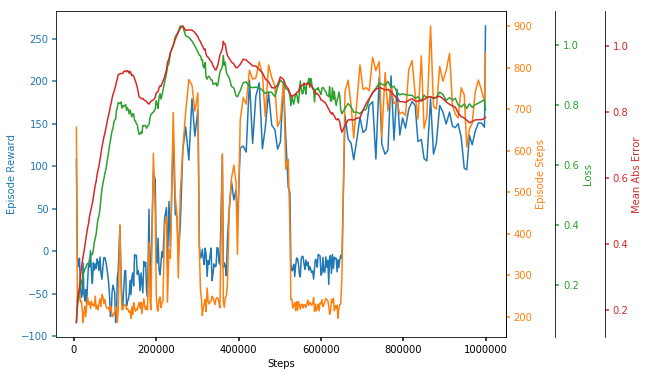

In [8]:
plot('data03.json')
plt.savefig('data03.json.png')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: